## Read the data set ##
[link text](https://)

In [258]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


In [259]:
column_names = [
    'age', 'employed_sector', 'final_weight ', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'gender',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

In [260]:
adult_train_df = pd.read_csv('adult.data', names=column_names)

In [261]:
adult_test_df = pd.read_csv('adult.test', names=column_names, skiprows=1, skipfooter=1)

## Structure of dataset ##

In [262]:
adult_train_df.head()

,age,employed_sector,final_weight,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [263]:
adult_test_df.head()

,age,employed_sector,final_weight,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [264]:
adult_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   employed_sector  32561 non-null  object
 2   final_weight     32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_num    32561 non-null  int64 
 5   marital_status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [265]:
adult_train_df.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [266]:
adult_train_df['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


## Cleaning Data Set ##

In [267]:
# Replace "?" with NaN in training data
adult_train_df = adult_train_df.map(lambda x: x.strip() if isinstance(x, str) else x)
adult_train_df.replace('?', pd.NA, inplace=True)
adult_train_df.head()

,age,employed_sector,final_weight,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [268]:
# Replace "?" with NaN in testing data
adult_test_df = adult_test_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
adult_test_df.replace('?', pd.NA, inplace=True)
adult_test_df.head()

,age,employed_sector,final_weight,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,<NA>,103497,Some-college,10,Never-married,<NA>,Own-child,White,Female,0,0,30,United-States,<=50K.


In [269]:
# check for missing values
def null_check(df):
    print("Missing values per column:")
    print(df.isnull().sum())

    # Display rows with missing values
    print("\nRows with missing values:")
    null_rows = df[df.isnull().any(axis=1)]
    print(null_rows)

null_check(adult_train_df)

Missing values per column:
age                   0
employed_sector    1836
final_weight          0
education             0
education_num         0
marital_status        0
occupation         1843
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      583
income                0
dtype: int64

Rows with missing values:
       age employed_sector  final_weight      education  education_num  \
14      40         Private         121772     Assoc-voc             11   
27      54            <NA>         180211  Some-college             10   
38      31         Private          84154  Some-college             10   
51      18         Private         226956       HS-grad              9   
61      32            <NA>         293936       7th-8th              4   
...    ...             ...            ...           ...            ...   
32530   35            <NA>         320084     Bachelors

In [270]:
# fill the missing values with mode
df_cleaned = adult_train_df.fillna(adult_train_df.mode().iloc[0])

In [271]:
null_check(df_cleaned)

Missing values per column:
age                0
employed_sector    0
final_weight       0
education          0
education_num      0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

Rows with missing values:
Empty DataFrame
Columns: [age, employed_sector, final_weight , education, education_num, marital_status, occupation, relationship, race, gender, capital_gain, capital_loss, hours_per_week, native_country, income]
Index: []


In [272]:
adult_train_df = df_cleaned

In [273]:
null_check(adult_train_df)

Missing values per column:
age                0
employed_sector    0
final_weight       0
education          0
education_num      0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

Rows with missing values:
Empty DataFrame
Columns: [age, employed_sector, final_weight , education, education_num, marital_status, occupation, relationship, race, gender, capital_gain, capital_loss, hours_per_week, native_country, income]
Index: []


In [274]:
null_check(adult_test_df)

Missing values per column:
age                  0
employed_sector    963
final_weight         0
education            0
education_num        0
marital_status       0
occupation         966
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     274
income               0
dtype: int64

Rows with missing values:
       age employed_sector  final_weight      education  education_num  \
4       18            <NA>         103497  Some-college             10   
6       29            <NA>         227026       HS-grad              9   
13      58            <NA>         299831       HS-grad              9   
19      40         Private          85019     Doctorate             16   
22      72            <NA>         132015       7th-8th              4   
...    ...             ...            ...           ...            ...   
16208   21            <NA>         212661  Some-college             10

In [275]:
# fill the missing values with mode
adult_test_df = adult_test_df.fillna(adult_test_df.mode().iloc[0])
adult_test_df.head()

,age,employed_sector,final_weight,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K.


In [276]:
# encode categorical values

df_encoded = adult_train_df.copy()

label_encoder = LabelEncoder()

# Choose categorical columns
categorical_columns = ['employed_sector', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'income']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    adult_test_df[col] = label_encoder.fit_transform(adult_test_df[col])

df_encoded

,age,employed_sector,final_weight,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [277]:
adult_train_df.info()
adult_train_df.head()

adult_train_without_encoding = adult_train_df.copy()
adult_train_df = df_encoded

adult_train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   employed_sector  32561 non-null  object
 2   final_weight     32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_num    32561 non-null  int64 
 5   marital_status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,employed_sector,final_weight,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [278]:
adult_test_df.head()

,age,employed_sector,final_weight,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,37,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,37,0


## Exploring Data using graphs ##

### Note: for better understanding of poster the screenshots are taken without categorical encoding so there might be slight differences in the screenshots in poster and the graphs displayed below ###

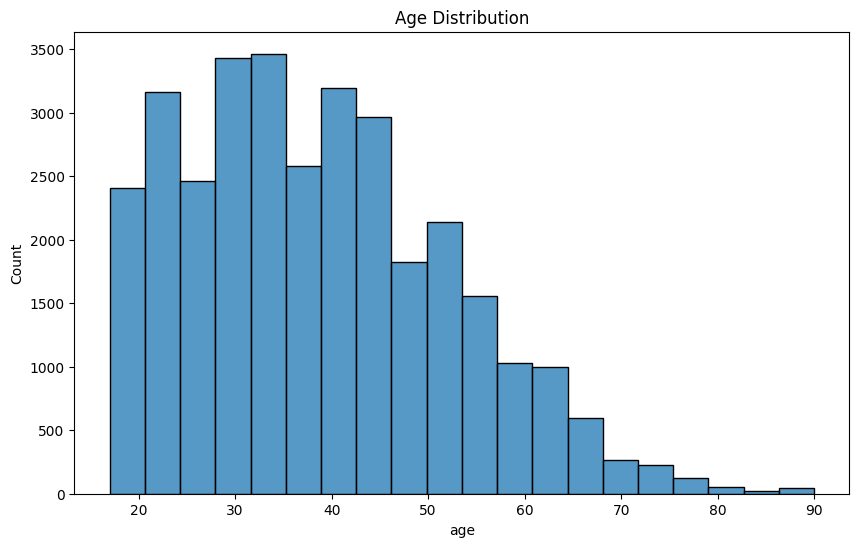

In [279]:
# Bar plot of population distribution by age
plt.figure(figsize=(10, 6))
sns.histplot(adult_train_df['age'], bins=20, kde=False)
plt.title('Age Distribution')
plt.show()


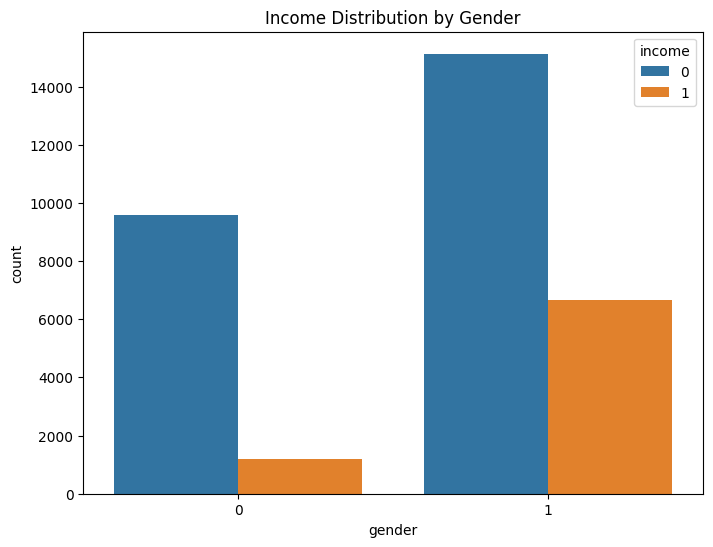

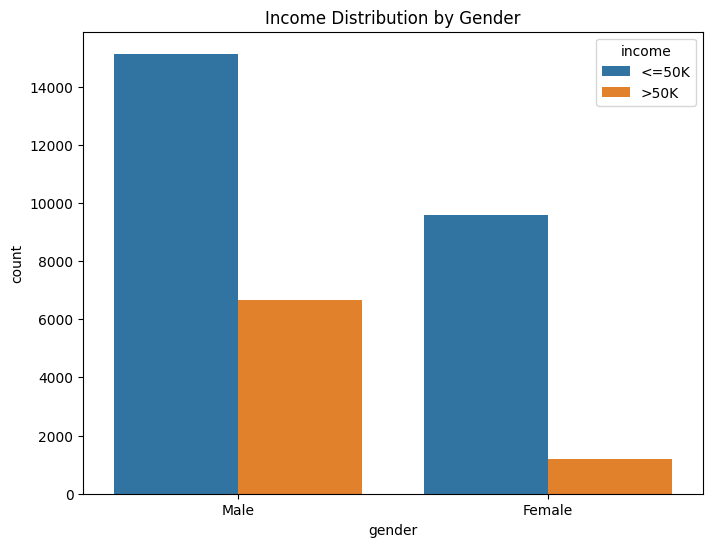

In [280]:
# Income by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income', data=adult_train_df)
plt.title('Income Distribution by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income', data=adult_train_without_encoding)
plt.title('Income Distribution by Gender')
plt.show()

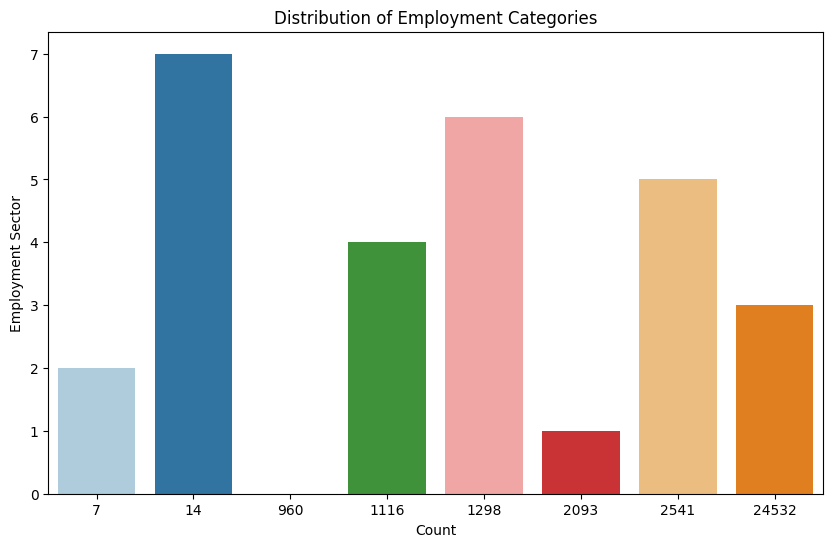

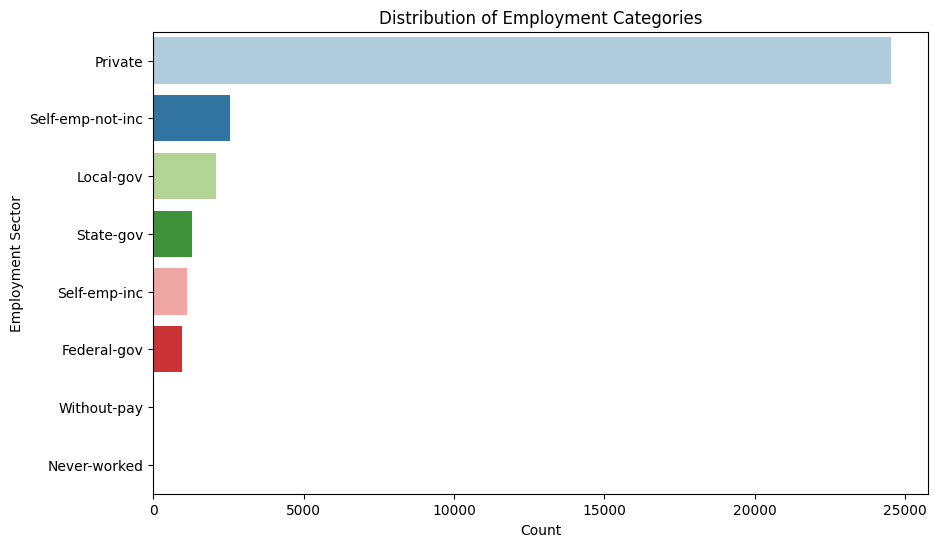

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotGraph(employment_sector):
   # Plot a horizontal bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=employment_sector.values, y=employment_sector.index, palette='Paired')
    plt.title('Distribution of Employment Categories')
    plt.xlabel('Count')
    plt.ylabel('Employment Sector')
    plt.show()


# Count the occurrences of each workclass category
employment_sector = adult_train_df['employed_sector'].value_counts()
plotGraph(employment_sector)

# Count the occurrences of each workclass category
employment_sector = adult_train_without_encoding['employed_sector'].value_counts()
plotGraph(employment_sector)



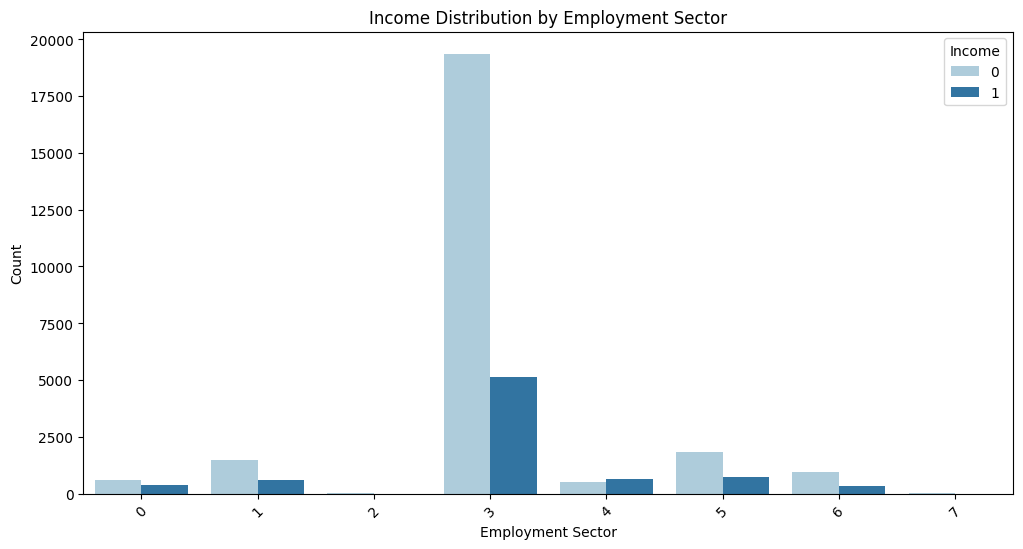

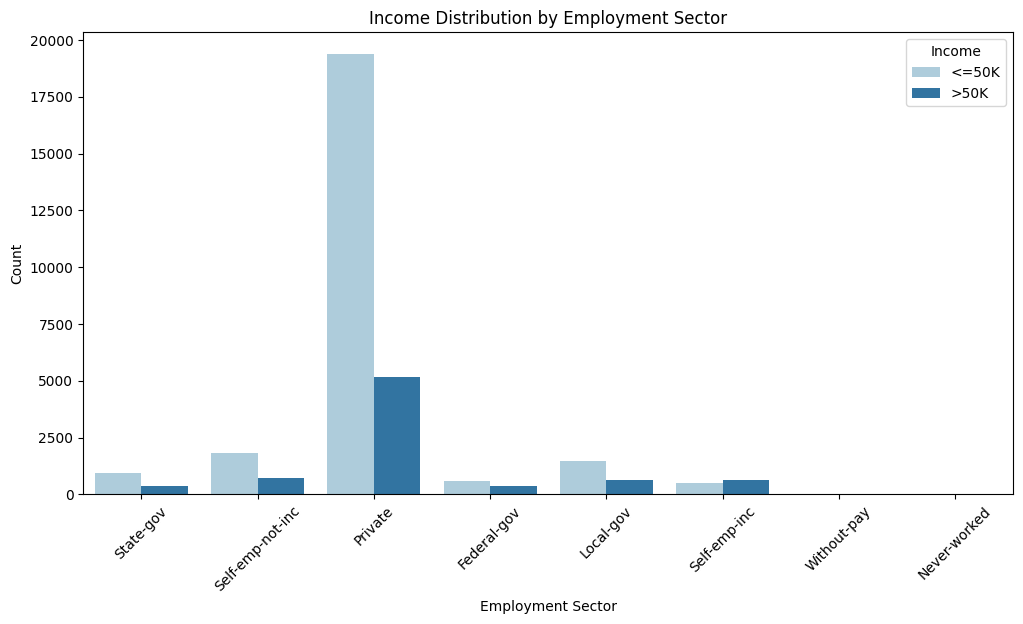

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt



def plotIncomeDistributionGraph(data_set):
    # Plot income distribution across employment sectors
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data_set, x='employed_sector', hue='income', palette='Paired')
      # Set plot labels and title
    plt.title('Income Distribution by Employment Sector')
    plt.xlabel('Employment Sector')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.legend(title='Income')
    plt.show()

# Using countplot to show the distribution of income per employment sector

plotIncomeDistributionGraph(adult_train_df)
plotIncomeDistributionGraph(adult_train_without_encoding)


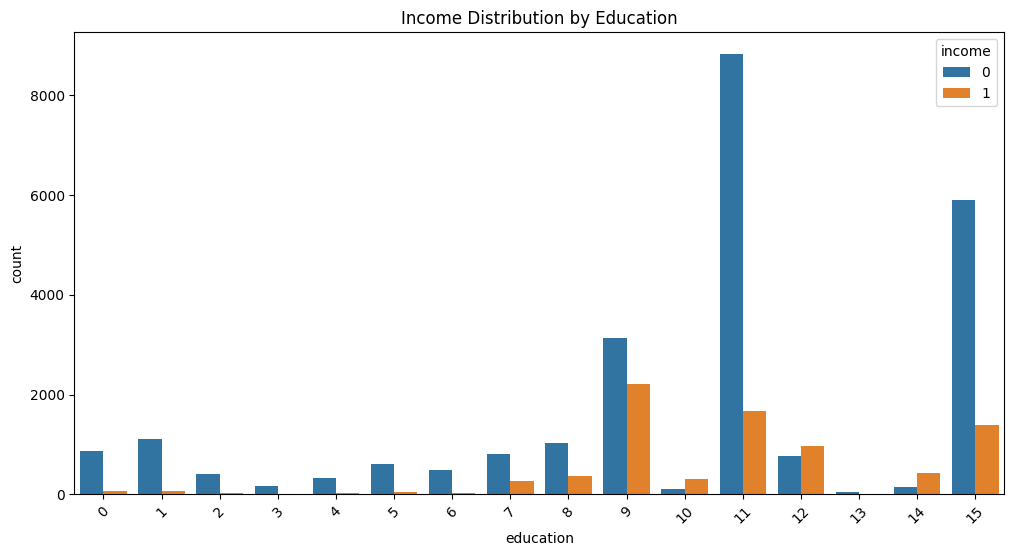

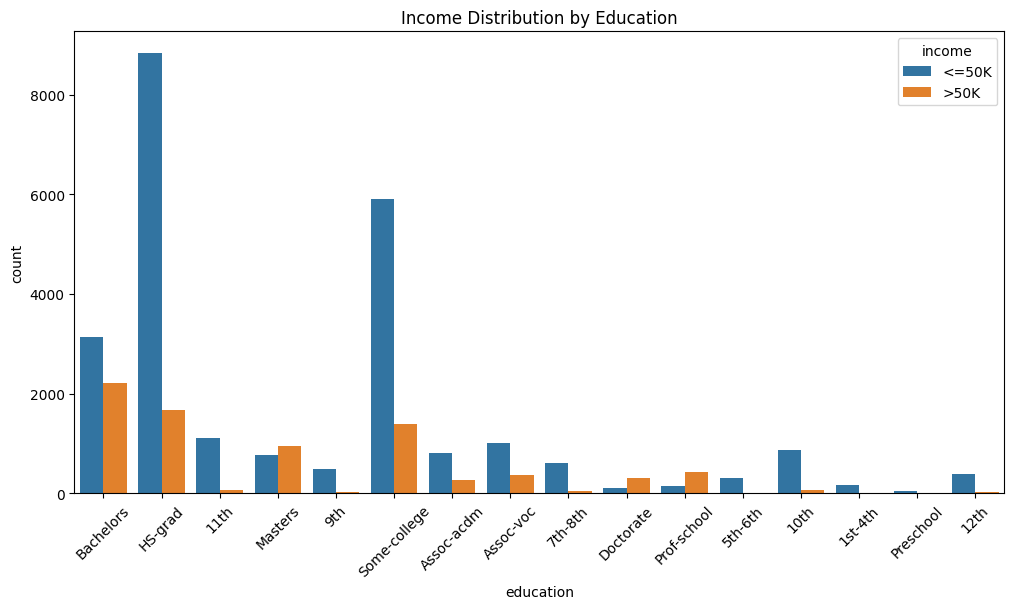

In [284]:
plt.figure(figsize=(12, 6))
sns.countplot(data=adult_train_df, x='education', hue='income')
plt.title('Income Distribution by Education')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=adult_train_without_encoding, x='education', hue='income')
plt.title('Income Distribution by Education')
plt.xticks(rotation=45)
plt.show()

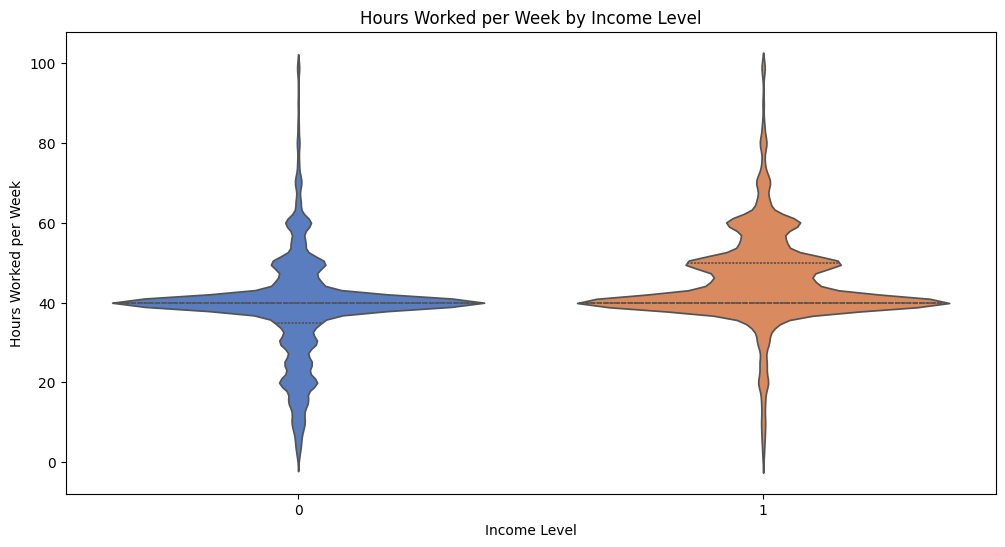

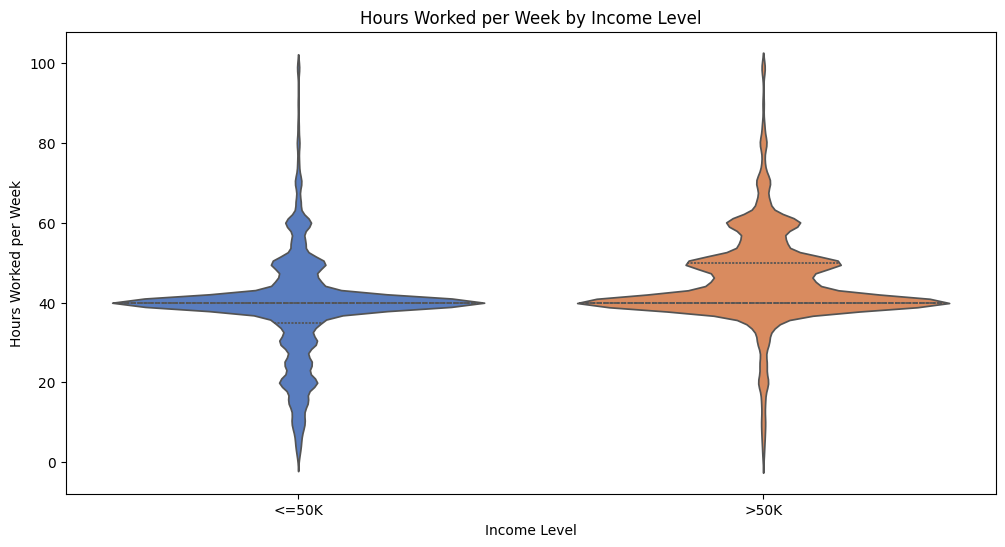

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot to show the distribution of hours worked per week by income level
plt.figure(figsize=(12, 6))
sns.violinplot(data=adult_train_df, x='income', y='hours_per_week', inner='quartile', palette='muted')
plt.title('Hours Worked per Week by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Hours Worked per Week')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=adult_train_without_encoding, x='income', y='hours_per_week', inner='quartile', palette='muted')
plt.title('Hours Worked per Week by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Hours Worked per Week')
plt.show()


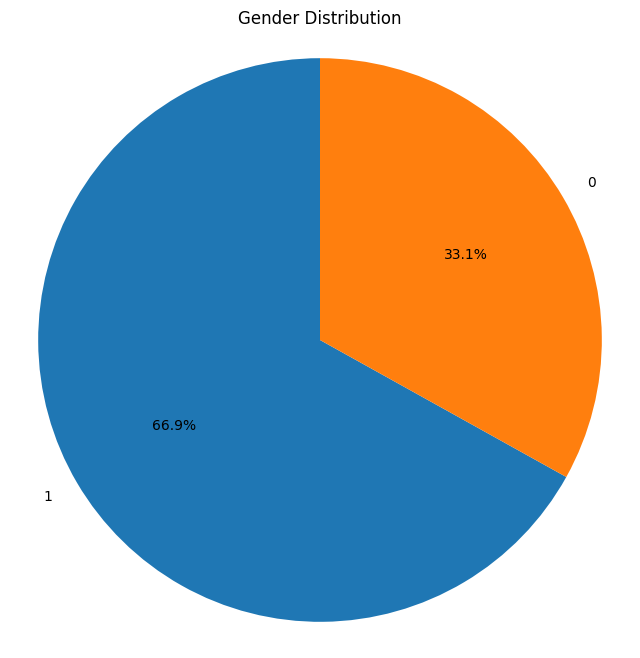

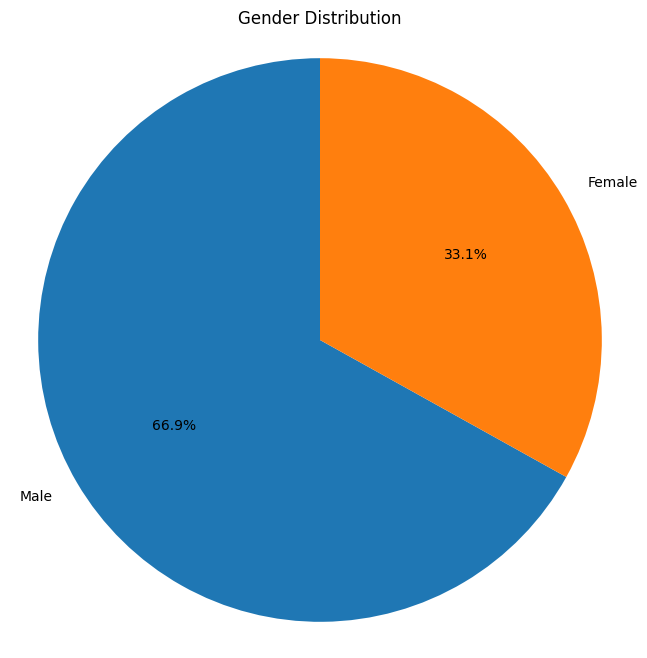

In [286]:
gender_counts = adult_train_df['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

gender_counts = adult_train_without_encoding['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

## Predictive Modelling ##

In [252]:
# Load training data
train_df = adult_train_df.copy()  # replace with your training file path
X_train = train_df.drop('income', axis=1)  # assuming 'income' is the target column
y_train = train_df['income']

# Load test data
test_df = adult_test_df.copy()  # replace with your test file path
X_test = test_df.drop('income', axis=1)  # assuming 'income' is the target column
y_test = test_df['income']



In [253]:
# random forest

X = adult_train_df.drop('income', axis=1)
y = adult_train_df['income']

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# set pos_label=1 Assuming '>50K' is the positive class
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 85.52%
Precision: 0.74
Recall: 0.60
F1-score: 0.66


In [254]:
# xgboost
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# set pos_label=1 Assuming '>50K' is the positive class
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)


# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 86.83%
Precision: 0.77
Recall: 0.63
F1-score: 0.69


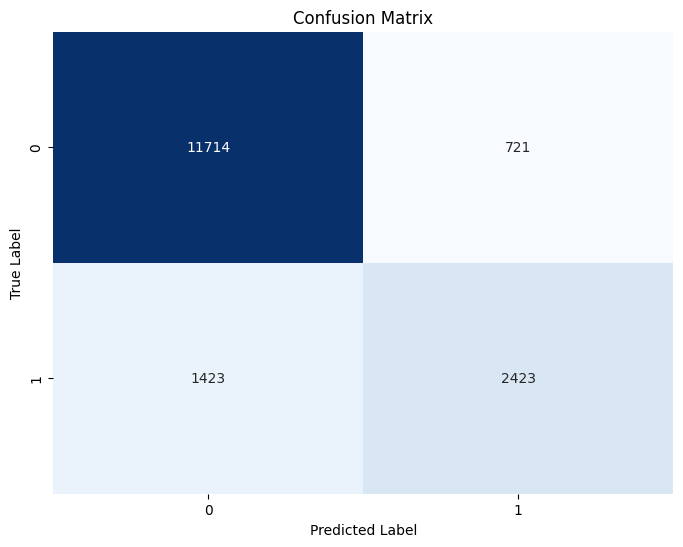

In [255]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()